###Practical Assessment

###Background

PetMind is a retailer of products for pets. They are based in the United States.
PetMind sells products that are a mix of luxury items and everyday items. Luxury items include
toys. Everyday items include food.
The company wants to increase sales by selling more everyday products repeatedly.
They have been testing this approach for the last year.
They now want a report on how repeat purchases impact sales.



![Table.png](/content/drive/MyDrive/DataCamp/Table.png)

###Tasks

1. For every column in the data:

  a. State whether the values match the description given in the table above.

  b. State the number of missing values in the column.

  c. Describe what you did to make values match the description if they did not
match.
2. Create a visualization that shows how many products are repeat purchases. Use the visualization to:

  a. State which category of the variable repeat purchases has the most
observations

  b. Explain whether the observations are balanced across categories of the
variable repeat purchases
3. Describe the distribution of all of the sales. Your answer must include a visualization that shows the distribution.
4. Describe the relationship between repeat purchases and sales. Your answer must include a visualization to demonstrate the relationship


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pet_supplies_data = pd.read_csv("/content/drive/MyDrive/DataCamp/pet_supplies_2212.csv")
pet_supplies_data.head(3)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1


In [3]:
#visualize all columns 

In [4]:
#visualize individual column (based on data type .i.e. categorical or numeric) boxplot, scatterplot, histogram, bar chart

###Data Cleaning


In [5]:
#initial data type
pet_supplies_data.dtypes

#N.B: Price should be float, size should be string

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object

In [6]:
#check for duplicates
pet_supplies_data.duplicated().sum()

0

In [7]:
#convert columns to the best possiblel dtypes; save in new dataframe
pet_supplies_df = pet_supplies_data.convert_dtypes()
pet_supplies_df.dtypes

product_id           Int64
category            string
animal              string
size                string
price               string
sales              Float64
rating               Int64
repeat_purchase      Int64
dtype: object

In [8]:
#check nulls
pet_supplies_df.isna().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

In [9]:
#count unique values
pet_supplies_df.product_id.count()

1500

In [10]:
#product_id
#check nulls
pet_supplies_df.product_id.isna().sum()

0

In [11]:
pet_supplies_df.product_id.dtype

Int64Dtype()

In [12]:
#category
pet_supplies_df.category.unique()

<StringArray>
['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory', '-']
Length: 7, dtype: string

In [13]:
#count unique values
pet_supplies_df.category.value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
-             25
Name: category, dtype: Int64

In [14]:
pet_supplies_df[pet_supplies_df['category'] == '-'] #check category with '-'

,product_id,category,animal,size,price,sales,rating,repeat_purchase
22,23,-,Bird,MEDIUM,32.98,859.94,3,0
72,73,-,Dog,small,33.13,1101.89,4,0
173,174,-,Bird,large,51.1,1868.47,5,0
178,179,-,Bird,large,50.99,1855.16,5,1
232,233,-,Cat,small,27.74,1024.25,6,1
267,268,-,Fish,Small,23.12,708.32,4,1
343,344,-,Cat,small,27.78,1026.38,6,0
369,370,-,Dog,large,unlisted,1462.67,<NA>,1
426,427,-,Cat,medium,unlisted,1080.53,<NA>,0
593,594,-,Fish,Medium,17.95,509.93,5,1


In [15]:
pet_supplies_df['category'] = pet_supplies_df.category.replace('-', 'Unknown') #replace '-' with 'Unknown'

In [16]:
pet_supplies_df[pet_supplies_df['category'] == '-'] #confirm replace is done

,product_id,category,animal,size,price,sales,rating,repeat_purchase


In [17]:
pet_supplies_df.category.unique() #reconfirm replace is done

<StringArray>
['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory', 'Unknown']
Length: 7, dtype: string

In [18]:
#animal
pet_supplies_df.animal.unique()

<StringArray>
['Bird', 'Dog', 'Cat', 'Fish']
Length: 4, dtype: string

In [19]:
pet_supplies_df.animal.value_counts()

Cat     567
Fish    369
Dog     367
Bird    197
Name: animal, dtype: Int64

In [20]:
pet_supplies_df.animal.dtype

string[python]

In [21]:
pet_supplies_df.animal.isna().sum()

0

In [22]:
#price
pet_supplies_df.price.dtype

string[python]

In [23]:
pet_supplies_df.price.unique()

<StringArray>
[ '51.1', '35.98', '31.23', '24.95', '26.18', '30.77', '31.04',  '28.9',
 '17.82', '24.93',
 ...
    '21', '29.79', '45.96', '29.81', '41.16', '40.98', '20.14', '39.96',
 '32.89', '25.79']
Length: 707, dtype: string

In [24]:
pet_supplies_df.price.value_counts()

unlisted    150
22.98        13
28           10
28.03         8
19.94         8
           ... 
41.18         1
23.17         1
15.09         1
22.81         1
25.79         1
Name: price, Length: 707, dtype: Int64

In [25]:
pet_supplies_df.price.max()

'unlisted'

In [26]:
#check price column with unlisted
pet_supplies_df[pet_supplies_df['price'] == 'unlisted'] #check category with 'unlisted'

,product_id,category,animal,size,price,sales,rating,repeat_purchase
20,21,Food,Fish,medium,unlisted,542.06,<NA>,0
44,45,Medicine,Bird,medium,unlisted,1209.41,<NA>,0
46,47,Toys,Cat,SMALL,unlisted,1367.47,<NA>,1
70,71,Equipment,Dog,LARGE,unlisted,1446.43,<NA>,0
73,74,Food,Bird,Large,unlisted,1864.01,<NA>,0
...,...,...,...,...,...,...,...,...
1447,1448,Medicine,Fish,medium,unlisted,456.96,<NA>,1
1469,1470,Equipment,Fish,small,unlisted,710.47,<NA>,0
1471,1472,Toys,Fish,small,unlisted,976.63,<NA>,0
1476,1477,Housing,Bird,large,unlisted,1567.31,<NA>,1


In [27]:
pet_supplies_df[pet_supplies_df['price'] == '0.0']

,product_id,category,animal,size,price,sales,rating,repeat_purchase


In [28]:
#change unlisted to zero
pet_supplies_df.price = pet_supplies_df.price.replace("unlisted",'0')
pet_supplies_df.price.value_counts()

0        150
22.98     13
28        10
28.03      8
19.94      8
        ... 
41.18      1
23.17      1
15.09      1
22.81      1
25.79      1
Name: price, Length: 707, dtype: Int64

In [29]:
#convert price dtype string to float
pet_supplies_df['price'] = pet_supplies_df['price'].astype(float)
pet_supplies_df['price'].dtype

dtype('float64')

In [30]:
pet_supplies_df.price.value_counts()

0.00     150
22.98     13
28.00     10
28.03      8
19.94      8
        ... 
38.66      1
36.00      1
19.97      1
39.19      1
25.79      1
Name: price, Length: 707, dtype: int64

In [31]:
#get the median of price and replace 0 with median price
pet_supplies_df.price.median()

27.93

In [32]:
#how many are of median price?
pet_supplies_df[pet_supplies_df['price'] == 27.93]

,product_id,category,animal,size,price,sales,rating,repeat_purchase
166,167,Equipment,Cat,small,27.93,1031.5,6,1
552,553,Equipment,Dog,medium,27.93,871.63,6,1
979,980,Equipment,Cat,Small,27.93,1033.08,6,0
1283,1284,Unknown,Fish,large,27.93,986.13,7,1


In [33]:
#replace 0 (was 'unlisted') with median price
pet_supplies_df.price = pet_supplies_df.price.replace(0, 27.93)
pet_supplies_df.price.value_counts()

27.93    154
22.98     13
28.00     10
19.94      8
27.97      8
        ... 
20.79      1
54.02      1
31.27      1
34.11      1
25.79      1
Name: price, Length: 706, dtype: int64

In [34]:
#check nulls
pet_supplies_df.price.isna().sum()

0

In [35]:
#size
pet_supplies_df['size']

0        large
1       MEDIUM
2       medium
3        small
4        Small
         ...  
1495    medium
1496     small
1497     Small
1498     small
1499    Medium
Name: size, Length: 1500, dtype: string

In [36]:
pet_supplies_df['size'] = pet_supplies_df['size'].astype(str)

In [37]:
pet_supplies_df['size'].dtype

dtype('O')

In [38]:
#count values - before case conversion
pet_supplies_df['size'].value_counts()

small     372
medium    233
Small     225
SMALL     157
Medium    150
large     122
MEDIUM    109
Large      75
LARGE      57
Name: size, dtype: int64

In [39]:
pet_supplies_df['size'] = pet_supplies_df['size'].str.title() 
pet_supplies_df['size'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [40]:
#count values -after case conversion

pet_supplies_df['size'].value_counts()

Small     754
Medium    492
Large     254
Name: size, dtype: int64

In [41]:
#sales

In [42]:
pet_supplies_df['sales'].isna().sum()

0

In [43]:
pet_supplies_df['sales'].unique()

<FloatingArray>
[1860.62,   963.6,   898.3,  982.15,  832.63,  874.58,  875.07, 1074.31,
  503.67,  838.88,
 ...
 1427.33,  746.16,  1365.7,  993.08,   535.9, 1478.99, 1203.36, 1099.97,
  724.02,  826.08]
Length: 1476, dtype: Float64

In [44]:
pet_supplies_df['sales'].value_counts()

1034.36    3
837.87     2
742.87     2
1020.3     2
1031.79    2
          ..
713.67     1
1427.33    1
746.16     1
1365.7     1
826.08     1
Name: sales, Length: 1476, dtype: Int64

In [45]:
pet_supplies_df['sales'].median() #median sales

1000.8299999999999

In [46]:
#rating
pet_supplies_df['rating'].isna().sum()

150

In [47]:
pet_supplies_df['rating'].value_counts()

5    304
6    299
4    283
3    190
7    143
8     61
2     43
9     15
1     12
Name: rating, dtype: Int64

In [48]:
#fillna with zero
pet_supplies_df['rating'] = pet_supplies_df['rating'].fillna(0)
pet_supplies_df['rating'].value_counts()

5    304
6    299
4    283
3    190
0    150
7    143
8     61
2     43
9     15
1     12
Name: rating, dtype: Int64

In [49]:
#repeat_purchase

pet_supplies_df['repeat_purchase'].isna().sum()

0

In [50]:
pet_supplies_df['repeat_purchase'].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

<Axes: xlabel='index', ylabel='repeat_purchase'>

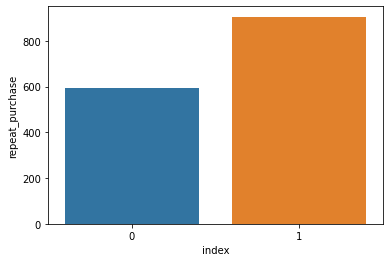

In [51]:
#repeat purchases using barplot
xx = pet_supplies_df['repeat_purchase'].value_counts().reset_index()
sns.barplot(x = 'index', y = 'repeat_purchase', data = xx)

#### Data Validation

For every column in the data:
* a. State whether the values match the description given in the table
* b. State the number of missing values in the column
* c. Describe what you did to make the values match the description if they did not match.


There are 1500 rows with 8 columns in the data with no duplicates found, the values match the descriptions while the data types were changed as follows: 

product_id - unchanged

category: changed from object to string

animal: changed from object to string

size: changed from object to string

price: changed from object to float

sales: unchanged

rating and repeat_purchase: changed to int64. 

Only the rating column contained 150 nulls (missing values), which is 10% of the total records. The null (missing) values in the rating column were replaced with zero as instructed in the brief. The category column had 25 values stored as '-', which was replaced with 'unknown' as instructed; the price column had 150 records stored as unlisted, this was changed to 0.0, converted to float and later imputed with the median price as instructed in the brief; the size column had values stored as a title, lower and upper case instead of sentence case as given in the table, this was converted to a title case for the sizes.




#### Data Discovery and Visualization
Describe what you found in the analysis and how the visualizations answer the customer questions in the task. In your description you should:

* Include at least two different data visualizations to demonstrate the characteristics of single variables
* Include at least one data visualization to demonstrate the relationship between two or more variables
* Describe how your analysis has answered the business questions 


#### Question 2.

In [52]:
#Set plot size
plt.rcParams['figure.figsize'] = [12, 8]

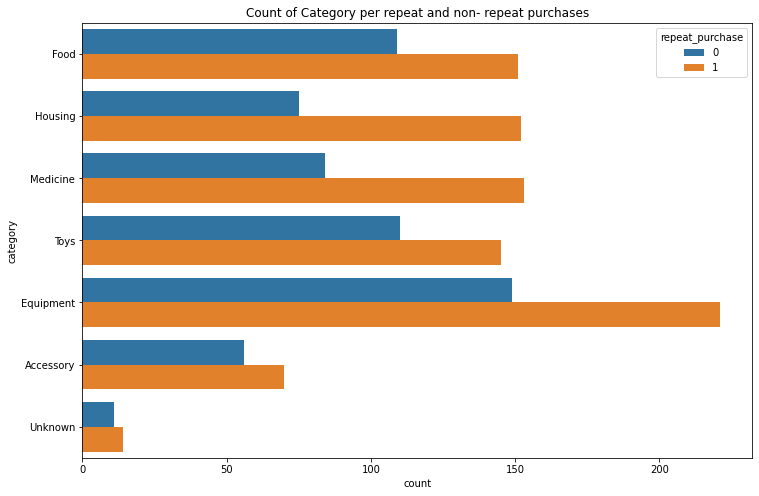

In [53]:
#2 #how many products are repeat purchases i.e. category vs repeat_purchases
#plot countplot for repeat_purchase column - use this visuallization to answer

#count plot visualizing repeat purchases
sns.countplot(y = 'category', hue = 'repeat_purchase', data = pet_supplies_df)
plt.title('Count of Category per repeat and non- repeat purchases')
plt.show();

# a. State which category of the variable repeat purchases has the most observations
# Answer: Equipment has the most observations of all product categories

# b. Explain whether the observations are balanced across categories of the variable repeat purchases
# The observations are not balanced across categories of repeat purchases since the number of repeat purchases (906) exceeds that of non-repeat
# purchases (594).


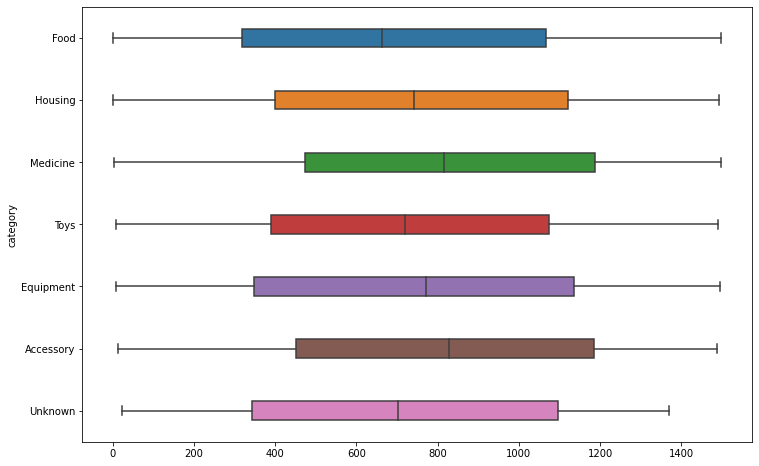

In [54]:
#boxplot showing overall count per category

sns.boxplot(x = pet_supplies_df.index, y= pet_supplies_df['category'], width = 0.3, orient = "h");
plt.show()


# a. State which category of the variable repeat purchases has the most observations
# Answer: Judging by the combined count of repeat purchase column for each category, Medicine and Accessory have the most observations of all product categories followed by Equipment.

# b. Explain whether the observations are balanced across categories of the variable repeat purchases
# The observations are not balanced across categories since the size and shape of the boxes and whiskers length for each category are not the same. Also, the number of observations for each category differs.

In [55]:
pet_supplies_df['category'].value_counts()

Equipment    370
Food         260
Toys         255
Medicine     237
Housing      227
Accessory    126
Unknown       25
Name: category, dtype: Int64

In [56]:
# 906 products are repeat purchases
pet_supplies_df['repeat_purchase'].value_counts()

1    906
0    594
Name: repeat_purchase, dtype: Int64

Text(0.5, 0, 'Sales Distribution')

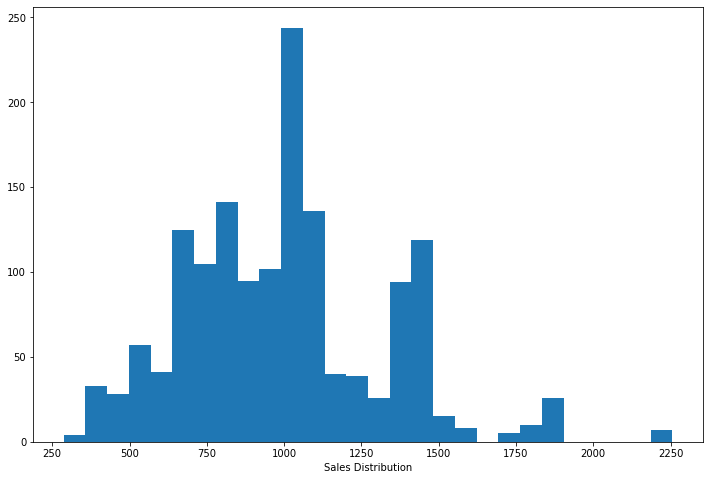

In [57]:
# 3. Describe the distribution of all of the sales. You must include a visualization that shows the distribution.
#use a histogram --- skewed distribution

x = pet_supplies_df['sales']
plt.hist(x, bins = 'auto')
plt.xlabel('Sales Distribution')
#plt.ylabel('Probability')

In [58]:
pet_supplies_df['sales'].median()

1000.8299999999999

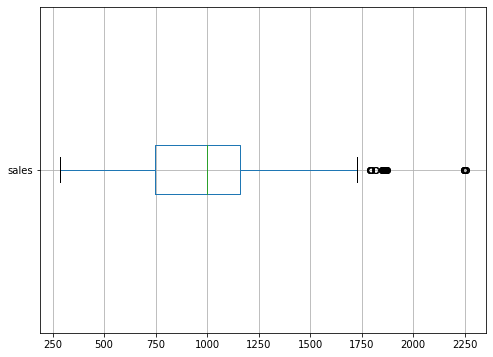

In [59]:
# 3. Describe the distribution of all of the sales. You must include a visualization that shows the distribution.
#using boxplot

pet_supplies_df.boxplot(column = 'sales', vert = False, figsize= (8,6));

The box plot shows that the median sales is 1000 and 50% of the data is between 750 and 1125. 

array([[<Axes: title={'center': 'sales'}>]], dtype=object)

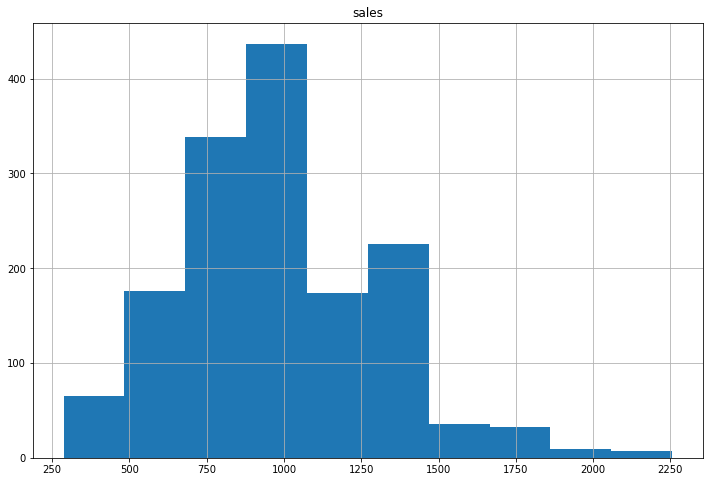

In [60]:
pet_supplies_df.hist(column = 'sales')

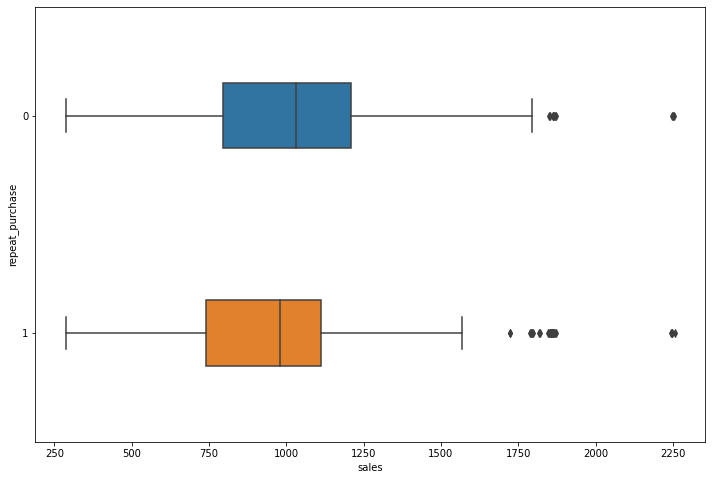

In [61]:
# 4. Describe the relationship between repeat purchases and sales. You must include a visualization to demonstrate the relationship

#boxplot showing relationship between sales and repeat_purchase
sns.boxplot(y = pet_supplies_df['repeat_purchase'], x = pet_supplies_df['sales'], width = 0.3, orient = "h");
plt.show()

Comparing the range and distribution of the repeat_purchase and sales. It is observed that there is a greater variability for non-repeat purchases (0) as well as larger outliers than there is for repeat purchases (1). Also, the medians are not so far apart but the boxplot somewhat overlap.